In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/1g/nb69w5095276sxhrps7sndf80000gn/T/ipykernel_39983/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("Ukraine_Black_Sea_2020_2024_Mar08.csv", delimiter=';')
data.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,POPULATION_1KM,POPULATION_2KM,POPULATION_5KM,POPULATION_BEST
0,ROU2045,16-January-2023,2023,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-2023),NaN,1,...,Adevarul; News.ro,National,"Defusal: On 16 January 2023, Romanian Naval Fo...",0,NaN,1687286172,NaN,NaN,9.0,NaN
1,ROU2026,10-December-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-2023),NaN,1,...,Agerpres; Deschide,National-Regional,"Defusal: On 10 December 2022, the Romanian nav...",0,NaN,1687286172,NaN,NaN,NaN,NaN
2,ROU1961,08-September-2022,2022,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Military Forces,NaN,8,...,Adevarul; Balkan Insight; Digi24; G4media; RFE/RL,National-Regional,"On 8 September 2022, a sea mine of unknown ori...",0,NaN,1687286172,NaN,NaN,NaN,NaN
3,ROU1947,04-August-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,crowd size=no report,1660055882,NaN,NaN,NaN,NaN
4,ROU1945,31-July-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-2023),NaN,1,...,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,NaN,1687286172,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION',
       'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'CIVILIAN_TARGETING', 'ISO', 'REGION', 'COUNTRY',
       'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'FATALITIES',
       'TAGS', 'TIMESTAMP', 'POPULATION_1KM', 'POPULATION_2KM',
       'POPULATION_5KM', 'POPULATION_BEST'],
      dtype='object')

In [8]:
data.shape

(151159, 35)

In [42]:
# Plot fatalaties by month and year as a line plot
# EVENT_DATE is for example 04-July-2022
data['EVENT_DATE'] = pd.to_datetime(data['EVENT_DATE'])

data['month'] = data['EVENT_DATE'].dt.month
data['year'] = data['EVENT_DATE'].dt.year

In [44]:
date_min = data['EVENT_DATE'].min()
date_max = data['EVENT_DATE'].max()
print(date_min, date_max)

2018-01-01 00:00:00 2024-03-08 00:00:00


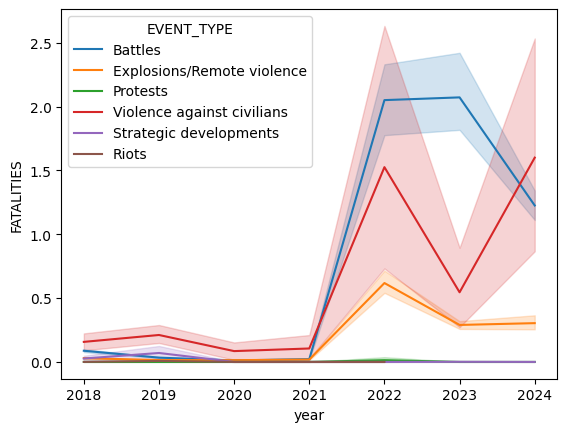

In [45]:
# Plot EVENT_TYPE as hue to see if there is a pattern
sns.lineplot(data=data, x='year', y='FATALITIES', hue='EVENT_TYPE')
plt.show()


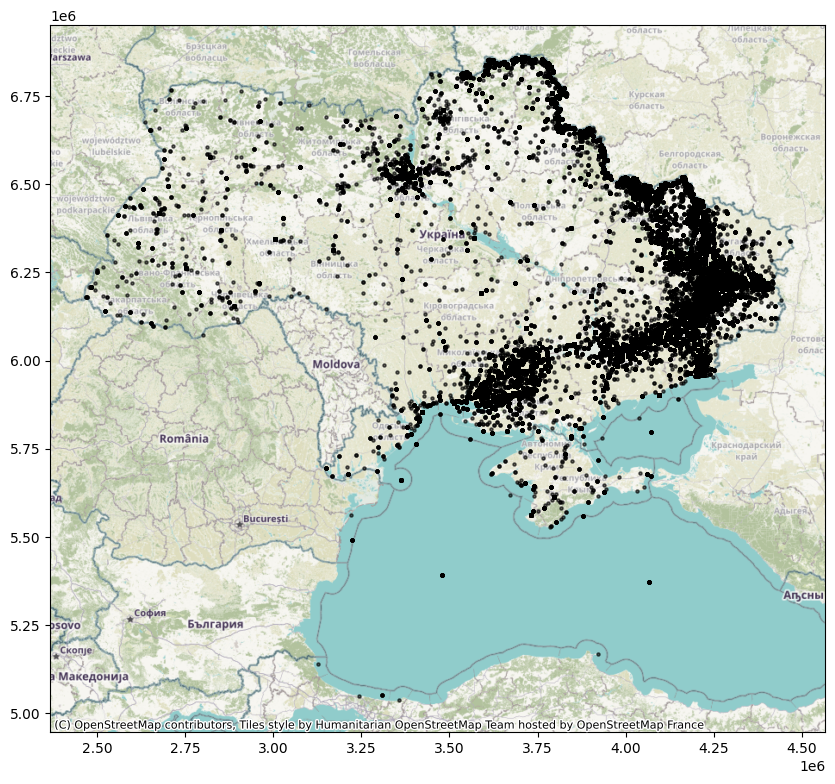

In [23]:
# Plot all latitude and longitude points on a map
import geopandas as gpd
from shapely.geometry import Point

# Replace comma with dot in LATITUDE and LONGITUDE
data['LATITUDE'] = data['LATITUDE'].str.replace(',', '.')
data['LONGITUDE'] = data['LONGITUDE'].str.replace(',', '.')
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.LONGITUDE, data.LATITUDE))




import contextily as ctx
import matplotlib.pyplot as plt

# Define the coordinate system to WGS84 (used by GPS)
gdf.crs = "EPSG:4326"

# Convert to Web Mercator for contextily
gdf_web_mercator = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf_web_mercator.plot(ax=ax, color='black', markersize=5, alpha=0.6)

# Add a basemap
ctx.add_basemap(ax)

plt.show()

In [25]:
# Number of nan values in each column
data.isna().sum()


EVENT_ID_CNTY              0
EVENT_DATE                 0
YEAR                       0
TIME_PRECISION             0
DISORDER_TYPE              0
EVENT_TYPE                 0
SUB_EVENT_TYPE             0
ACTOR1                     0
ASSOC_ACTOR_1         139480
INTER1                     0
ACTOR2                 70227
ASSOC_ACTOR_2         134245
INTER2                     0
INTERACTION                0
CIVILIAN_TARGETING    144133
ISO                        0
REGION                     0
COUNTRY                    0
ADMIN1                    38
ADMIN2                   149
ADMIN3                  2697
LOCATION                   0
LATITUDE                   0
LONGITUDE                  0
GEO_PRECISION              0
SOURCE                     0
SOURCE_SCALE               0
NOTES                      0
FATALITIES                 0
TAGS                  144594
TIMESTAMP                  0
POPULATION_1KM         31923
POPULATION_2KM         31895
POPULATION_5KM         32077
POPULATION_BES

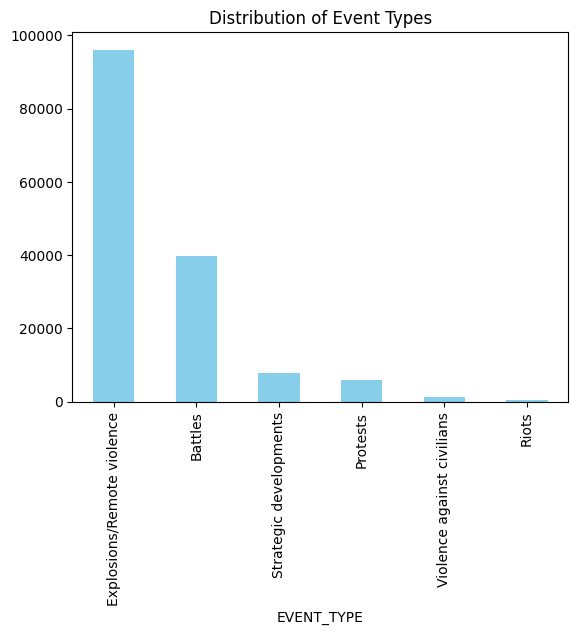

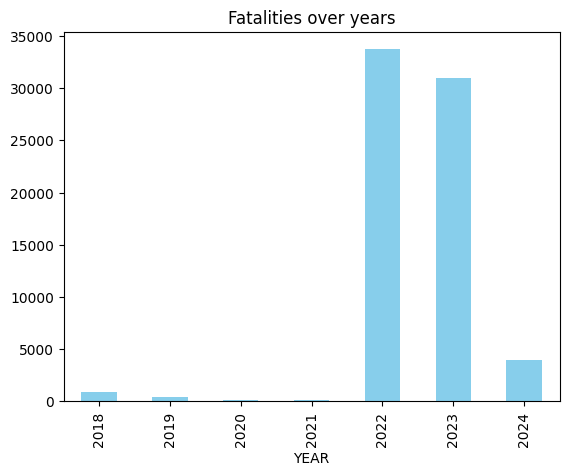

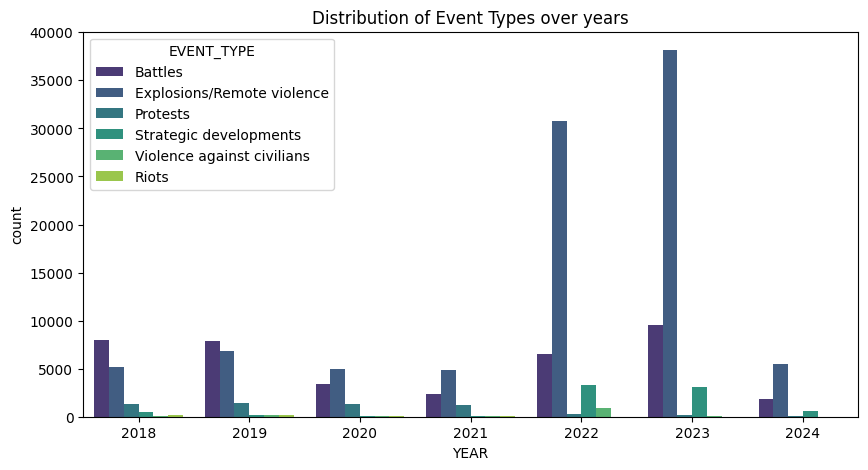

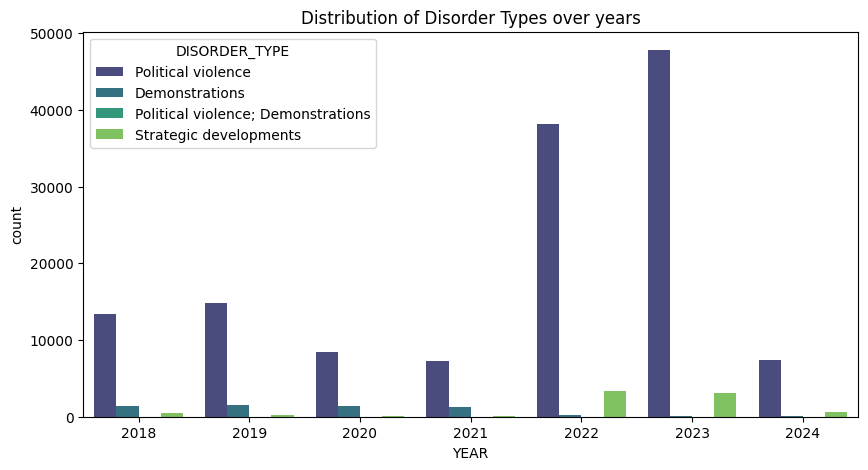

/var/folders/1g/nb69w5095276sxhrps7sndf80000gn/T/ipykernel_39983/1477781226.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='ACTOR1', palette='viridis', order=data['ACTOR1'].value_counts().index[:10])


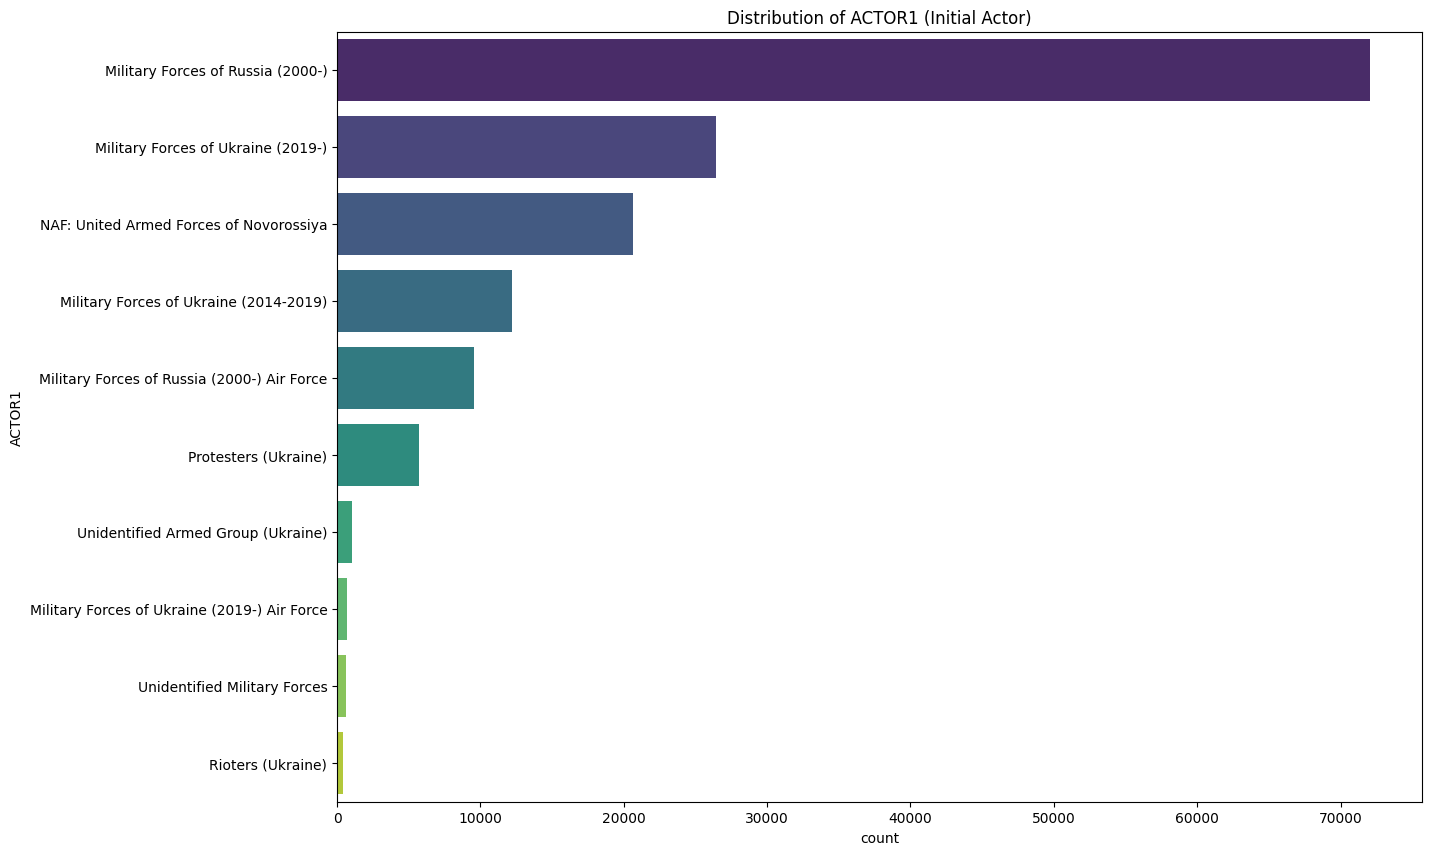

/var/folders/1g/nb69w5095276sxhrps7sndf80000gn/T/ipykernel_39983/1477781226.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='SUB_EVENT_TYPE', palette='viridis', order=data['SUB_EVENT_TYPE'].value_counts().index[:10])


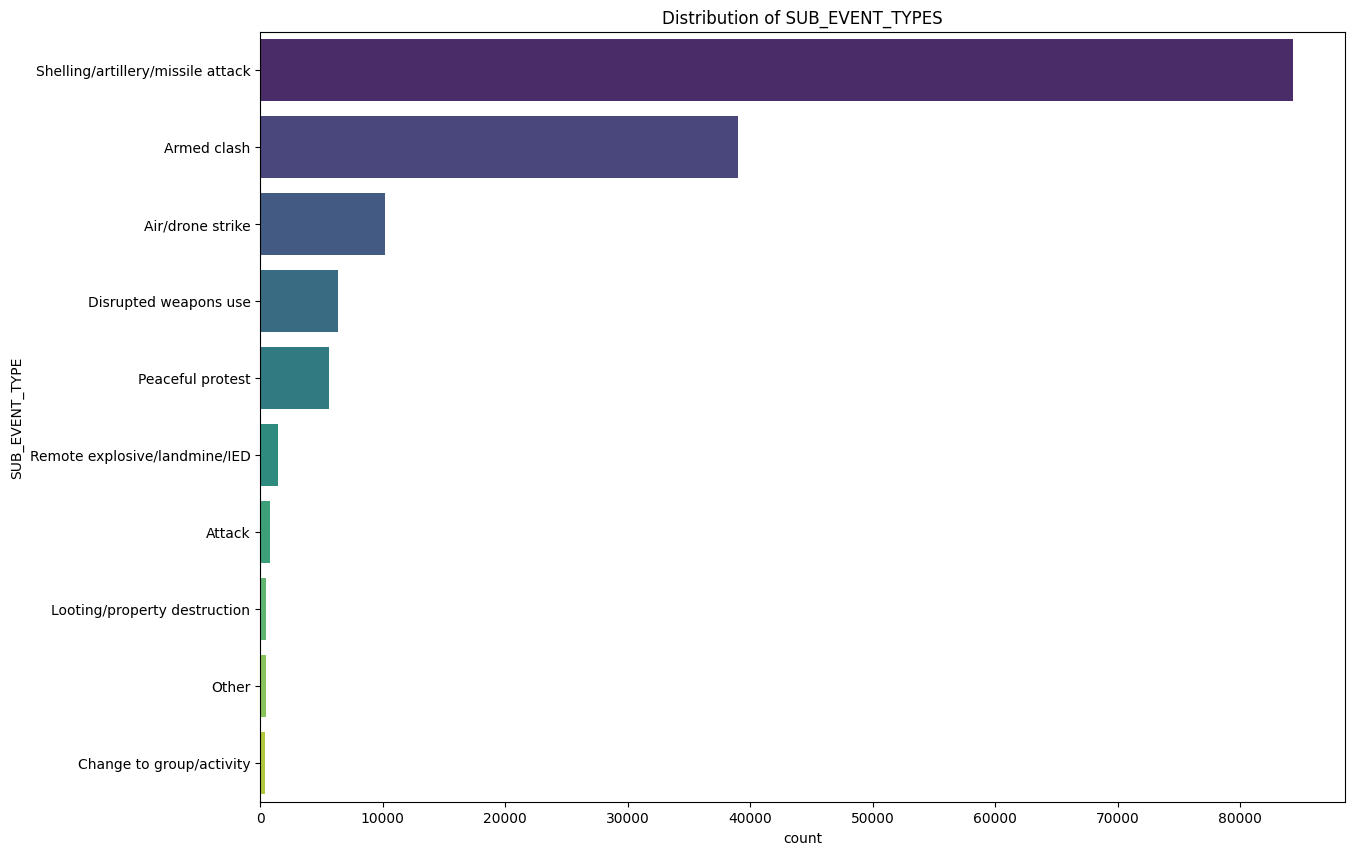

In [59]:
# Show the distribution of Event Types
data['EVENT_TYPE'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Event Types")
plt.show()

# Show the distribution of Fatalities over years
data.groupby('YEAR')['FATALITIES'].sum().plot(kind='bar', color='skyblue')
plt.title("Fatalities over years")
plt.show()

# Show the distribution of each individual event type over years
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='YEAR', hue='EVENT_TYPE', palette='viridis')
plt.title("Distribution of Event Types over years")
plt.show()

# Distribution of disorder types over years
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='YEAR', hue='DISORDER_TYPE', palette='viridis')
plt.title("Distribution of Disorder Types over years")
plt.show()

# Distribution of ACTOR1
fig, ax = plt.subplots(figsize=(14, 10))
sns.countplot(data=data, y='ACTOR1', palette='viridis', order=data['ACTOR1'].value_counts().index[:10])
plt.title("Distribution of ACTOR1 (Initial Actor)")
plt.show()

# Distribution of SUB_EVENT_TYPE over years
fig, ax = plt.subplots(figsize=(14, 10))
sns.countplot(data=data, y='SUB_EVENT_TYPE', palette='viridis', order=data['SUB_EVENT_TYPE'].value_counts().index[:10])
plt.title("Distribution of SUB_EVENT_TYPES")
plt.show()






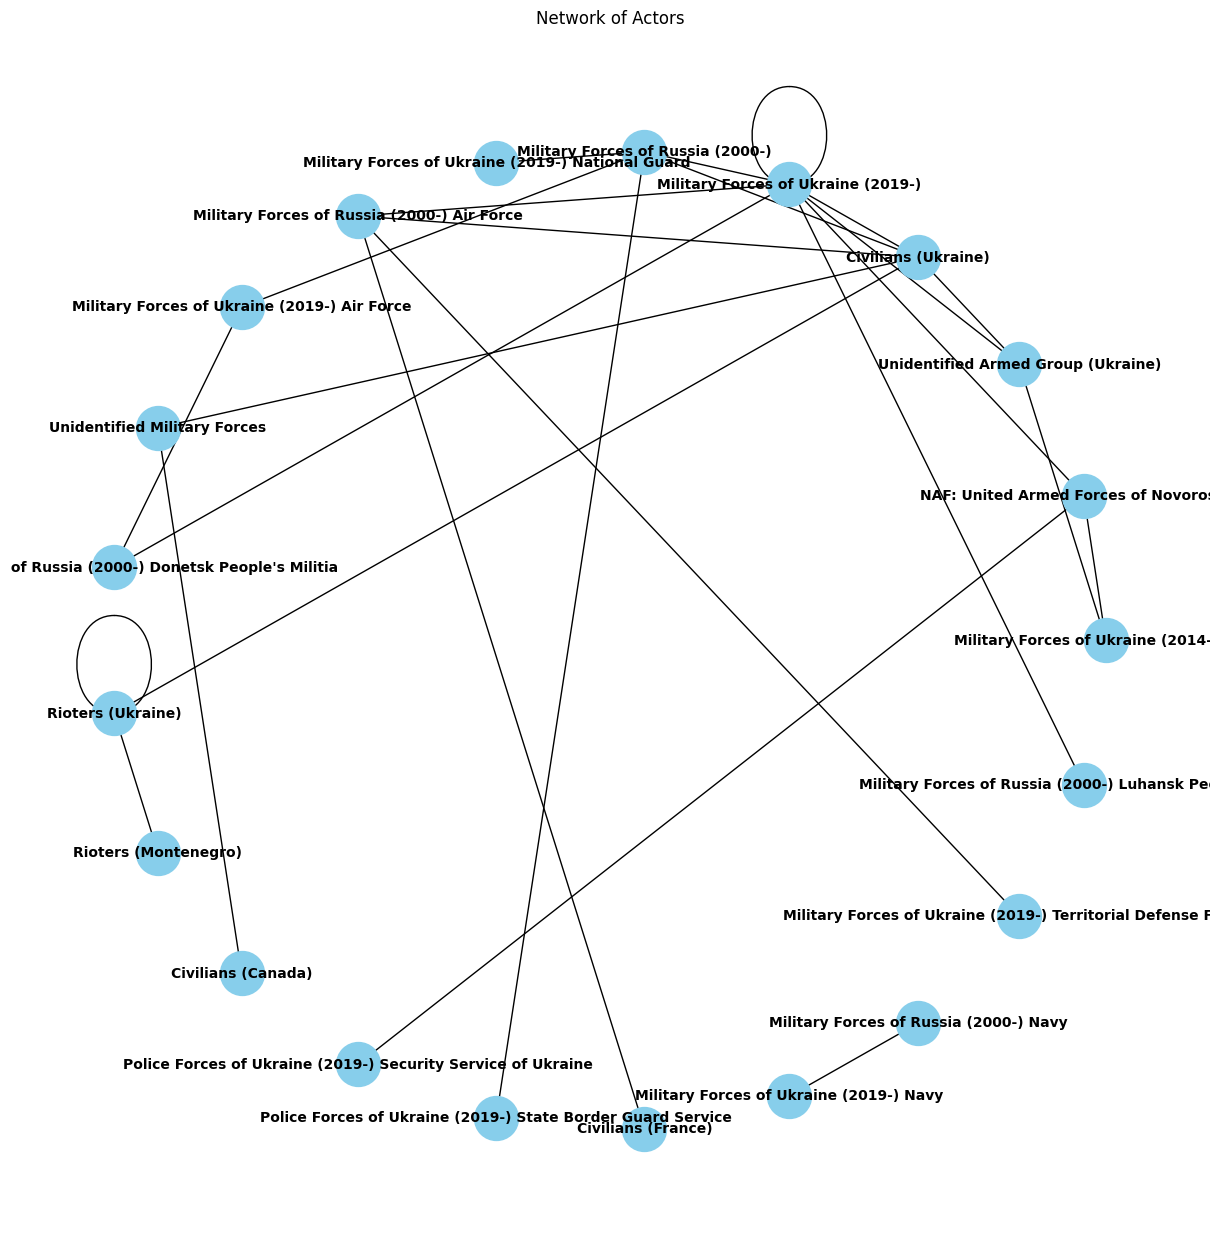

In [79]:
# Do a network analysis of the actors
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges
c = 0

battles = data[data['DISORDER_TYPE'] == 'Political violence']
for i, row in battles.iterrows():
    if row['ACTOR2'] is not np.nan:
        G.add_edge(row['ACTOR1'], row['ACTOR2'], weight=row['FATALITIES'])
    if c == 2000:
        break

    c+=1
        

# Draw the graph
plt.figure(figsize=(12, 12))
#pos = nx.spring_layout(G, seed=42)
#pos=nx.fruchterman_reingold_layout(G)
pos=nx.circular_layout(G)
#pos=nx.random_layout(G)
#pos=nx.spectral_layout(G)

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title("Network of Actors")
plt.show()



In [81]:
import plotly.express as px

# Assuming 'data' is your DataFrame and it includes 'LATITUDE', 'LONGITUDE', and 'EVENT_TYPE' columns
fig = px.scatter_geo(data,
                     lat='LATITUDE',
                     lon='LONGITUDE',
                     color='EVENT_TYPE',  # This will create a different color for each event type
                     hover_name='EVENT_TYPE',  # Shows event type on hover
                     hover_data=['FATALITIES', 'DATE', 'NOTES'],  # Additional data to show on hover
                     projection="natural earth",  # Type of the map projection
                     title='Interactive Map of Events')

# Add dropdowns for filtering by event type
event_types = data['EVENT_TYPE'].unique()
buttons = []

# Create a button for each event type plus one for all data
for event_type in event_types:
    buttons.append(
        dict(method='update',
             label=event_type,
             args=[{'visible': [event == event_type for event in data['EVENT_TYPE']]}])
    )

# Button to reset the view to show all
buttons.append(
    dict(method='update',
         label='All',
         args=[{'visible': [True] * len(data)}])
)

# Add dropdowns to the layout
fig.update_layout(
    updatemenus=[dict(active=0,
                      buttons=buttons,
                      x=0.1,  # Dropdown x position
                      xanchor='left',
                      y=1.1,  # Dropdown y position
                      yanchor='top')]
)

fig.show()


ValueError: Value of 'hover_data_1' is not the name of a column in 'data_frame'. Expected one of ['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION', 'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2', 'INTERACTION', 'CIVILIAN_TARGETING', 'ISO', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TAGS', 'TIMESTAMP', 'POPULATION_1KM', 'POPULATION_2KM', 'POPULATION_5KM', 'POPULATION_BEST', 'geometry', 'month', 'year'] but received: DATE